In [1]:
#Imports
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Conv3D, MaxPool2D, MaxPool3D, Flatten, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import splitfolders 
from glob import glob

In [2]:
# Split folders into training, validation and test set (with splitfolders library, to be installed first)
splitfolders.ratio('C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\PetImages', output="output", seed=1337, ratio=(.8, 0.1,0.1))

In [3]:
# Hiperaparameters and path definitions
IMAGE_SIZE = [100, 100]

epochs = 5
batch_size = 32

path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\output'
train_path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\output\\train'
valid_path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\output\\val'
test_path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\output\\test'


image_files = glob(path + '/*/*/*.jp*g')
folders = glob(path + '/*')

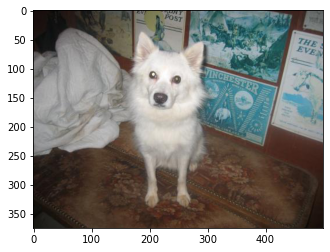

In [4]:
# Display a sample image, just for test
plt.imshow(
  image.img_to_array(
    image.load_img(
      np.random.choice(image_files)
    )
  ).astype('uint8')
)
plt.show()

In [5]:
# Generator initializaton
img_gen = ImageDataGenerator(rescale=1./255)

In [6]:
# Data generation
train_generator = img_gen.flow_from_directory(train_path, target_size=IMAGE_SIZE, class_mode='binary', shuffle=True, batch_size=batch_size) # set as training data
val_generator = img_gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, class_mode='binary', shuffle=True, batch_size=batch_size) # set as validation data
test_generator = img_gen.flow_from_directory(test_path, target_size=IMAGE_SIZE, class_mode='binary', shuffle=True, batch_size=batch_size)

Found 19998 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [7]:
print(train_generator.class_indices)
print(train_generator.labels)

{'Cat': 0, 'Dog': 1}
[0 0 0 ... 1 1 1]


In [8]:
# Preparing test images and test labels for evaluation and metrics
test_images = []
for i in range(test_generator.__len__()):
    test_images.extend(
        test_generator.__getitem__(i)[0]
        )

In [9]:
test_labels = []
for j in range(test_generator.__len__()):
    test_labels.extend(
        test_generator.__getitem__(j)[1]
        )

In [10]:
# CNN model
model = Sequential()

# First covolutional layer
model.add(Conv2D(
    filters=128, 
    kernel_size=(3,3), 
    input_shape=(100, 100, 3), 
    activation='relu'
    )
)
model.add(MaxPool2D(pool_size=(2,2)))

# Second covolutional layer
model.add(Conv2D(
    filters=56, 
    kernel_size=(3,3), 
    input_shape=(100, 100, 3), 
    activation='relu'
    )
)
model.add(MaxPool2D(pool_size=(2,2)))

# Third covolutional layer
model.add(Conv2D(
    filters=28, 
    kernel_size=(3,3), 
    input_shape=(100, 100, 3), 
    activation='relu'
    )
)


model.add(MaxPool2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())


# Dense layer
model.add(Dense(1000, activation='relu'))

# Output layer - classifier
model.add(Dense(1, activation='sigmoid'))


In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 56)        64568     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 56)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 28)        14140     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2800)              0

In [12]:
# Skip invalid data
def my_gen(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except PIL.UnidentifiedImageError:
            pass

In [13]:
train_generator = my_gen(train_generator)
val_generator = my_gen(val_generator)
test_generator = my_gen(test_generator)

In [14]:
model.fit(
          train_generator,
          steps_per_epoch = 20000 // batch_size,
          validation_data= val_generator,
          validation_steps = 2500 // batch_size,
          epochs=epochs
    )

Epoch 1/5
 61/625 [=>............................] - ETA: 11:42 - loss: 0.7560 - accuracy: 0.5225

C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffIma

625/625 [==============================] - 762s 1s/step - loss: 0.6375 - accuracy: 0.6362 - val_loss: 0.5273 - val_accuracy: 0.7448
Epoch 2/5
625/625 [==============================] - 746s 1s/step - loss: 0.5121 - accuracy: 0.7501 - val_loss: 0.4486 - val_accuracy: 0.7829
Epoch 3/5
625/625 [==============================] - 749s 1s/step - loss: 0.4416 - accuracy: 0.7979 - val_loss: 0.4041 - val_accuracy: 0.8181
Epoch 4/5
625/625 [==============================] - 745s 1s/step - loss: 0.3944 - accuracy: 0.8267 - val_loss: 0.3878 - val_accuracy: 0.8229
Epoch 5/5
625/625 [==============================] - 760s 1s/step - loss: 0.3474 - accuracy: 0.8485 - val_loss: 0.5221 - val_accuracy: 0.7997


In [15]:
test_labels=np.asarray(test_labels)
test_images=np.asarray(test_images)

In [16]:
# Model evaluation
model.evaluate(test_images, test_labels)

79/79 [==============================] - 29s 361ms/step - loss: 0.5061 - accuracy: 0.8221


[0.5060821175575256, 0.8221423029899597]

In [17]:
predictions = np.round(model.predict(test_images))
print(classification_report(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      1251
         1.0       0.91      0.72      0.80      1251

    accuracy                           0.82      2502
   macro avg       0.84      0.82      0.82      2502
weighted avg       0.84      0.82      0.82      2502

[[1162   89]
 [ 356  895]]


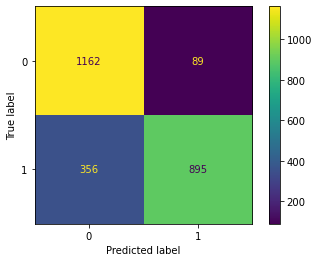

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, predictions))


disp.plot()
plt.show()

In [19]:
# Save model
model.save('my_model.h5_splitted')